In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
file_path = r"D:\Excelr\EastWestAirlines.xlsx"   # correct file extension
df = pd.read_excel(file_path, sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# 1. Handle Missing Values
print("Missing values per column:\n", df.isnull().sum())



Missing values per column:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [4]:
# Drop ID column (not useful for clustering)
df_clean = df.drop(columns=["ID#"])

# 2. Outlier Removal using IQR method
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original shape: {df_clean.shape}, After outlier removal: {df_no_outliers.shape}")


Original shape: (3999, 11), After outlier removal: (2875, 11)


In [5]:
# 3. Scaling Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)
df_scaled


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072
...,...,...,...,...,...,...,...,...,...,...,...
2870,-0.665761,0.0,-0.719055,0.0,0.0,-0.171862,-0.694742,0.948432,1.653181,-1.235018,1.604952
2871,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952
2872,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952
2873,0.189152,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,2.939335,1.653181,-1.235997,-0.623072


In [6]:

# --- Exploratory Data Analysis (EDA) ---
# Summary statistics
print("\nSummary statistics:\n", df_no_outliers.describe())


Summary statistics:
              Balance  Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    2875.000000      2875.0  2875.000000     2875.0     2875.0   
mean    46840.297739         0.0     1.829913        1.0        1.0   
std     42611.722286         0.0     1.154373        0.0        0.0   
min        50.000000         0.0     1.000000        1.0        1.0   
25%     15275.000000         0.0     1.000000        1.0        1.0   
50%     33327.000000         0.0     1.000000        1.0        1.0   
75%     65980.500000         0.0     3.000000        1.0        1.0   
max    202636.000000         0.0     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   2875.000000  2875.000000        2875.000000      2875.000000   
mean   10872.930435     9.385739          57.085217         0.198609   
std    13664.119401     7.753492         150.711569         0.484841   
min        0.000000     0.000000           0.00000

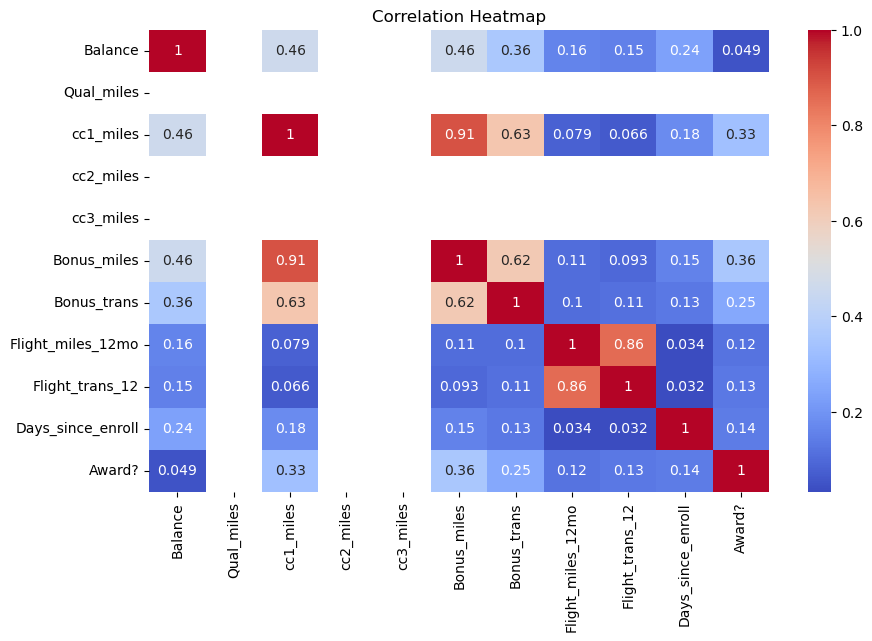

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_no_outliers.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

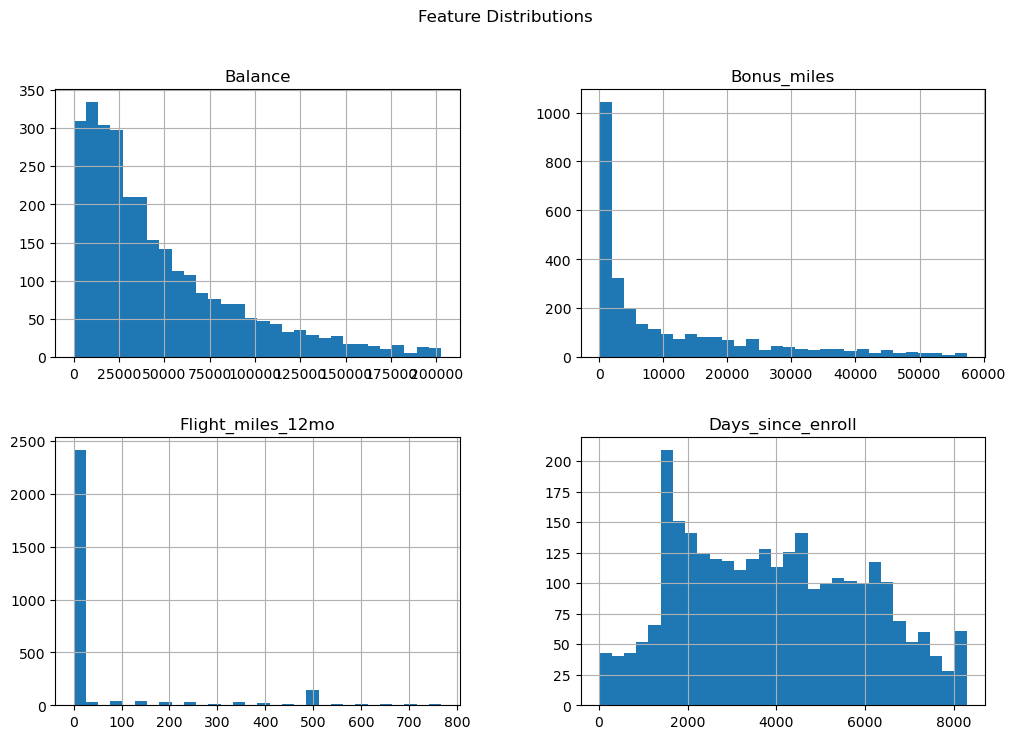

In [8]:
# Histograms of key features
df_no_outliers[['Balance','Bonus_miles','Flight_miles_12mo','Days_since_enroll']].hist(bins=30, figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()



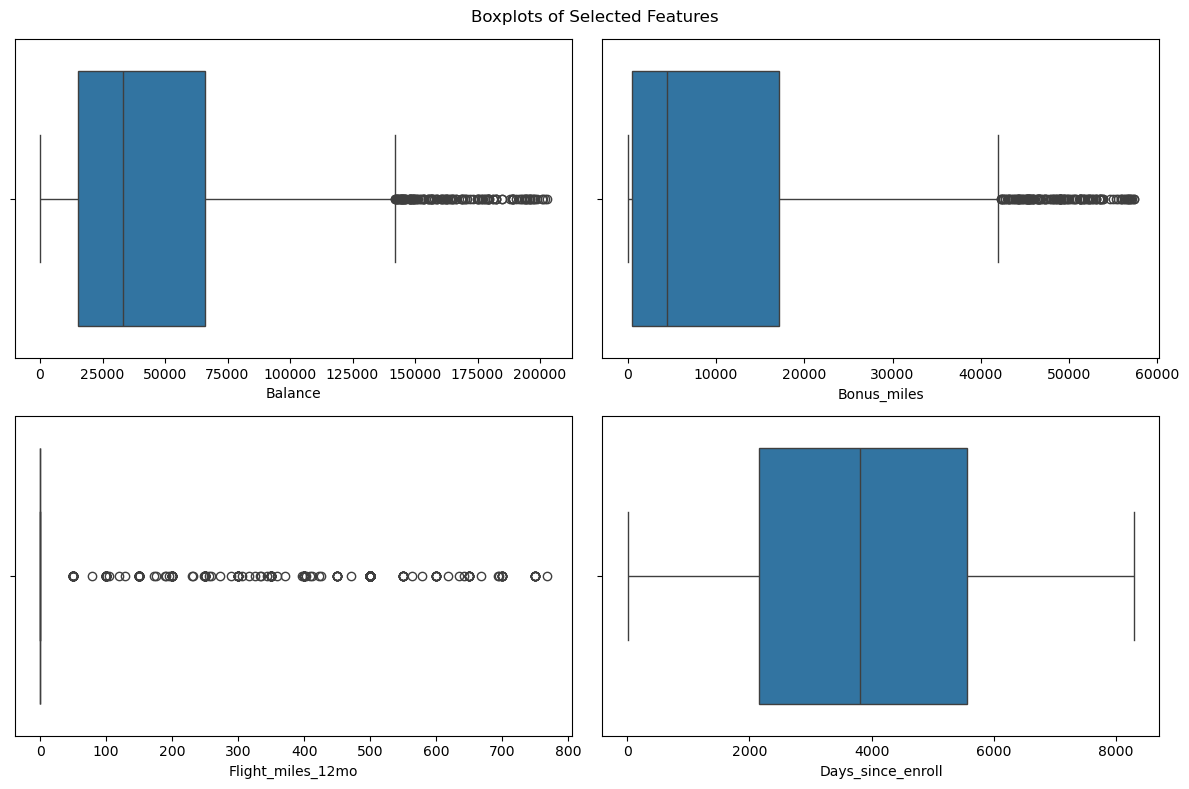

In [9]:
# Boxplots to detect skewness/outliers
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(x=df_no_outliers['Balance'], ax=axes[0,0])
sns.boxplot(x=df_no_outliers['Bonus_miles'], ax=axes[0,1])
sns.boxplot(x=df_no_outliers['Flight_miles_12mo'], ax=axes[1,0])
sns.boxplot(x=df_no_outliers['Days_since_enroll'], ax=axes[1,1])
plt.suptitle("Boxplots of Selected Features")
plt.tight_layout()
plt.show()

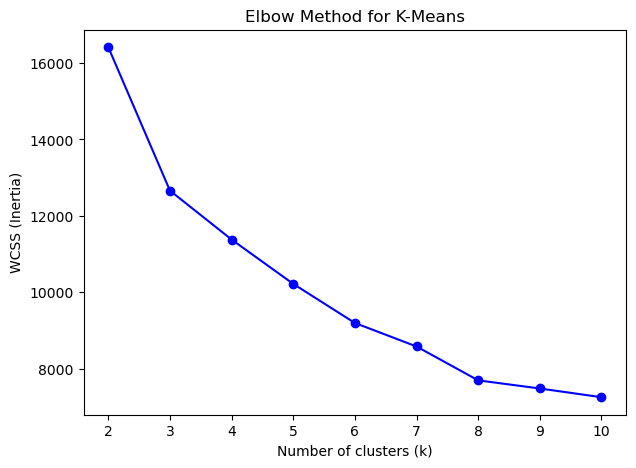

K-Means silhouette score (k=2): 0.322
K-Means silhouette score (k=3): 0.342
K-Means silhouette score (k=4): 0.230
K-Means silhouette score (k=5): 0.242
K-Means silhouette score (k=6): 0.255


In [10]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
# --- Use scaled dataset (df_scaled) from preprocessing step ---
X = df_scaled.copy()

# =========================================================
# 1. K-MEANS CLUSTERING
# =========================================================
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for K-Means")
plt.show()

# Check silhouette scores for k=2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"K-Means silhouette score (k={k}): {sil:.3f}")
# Fit final KMeans with 4 clusters (example, adjust after elbow curve)
kmeans_final = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X)


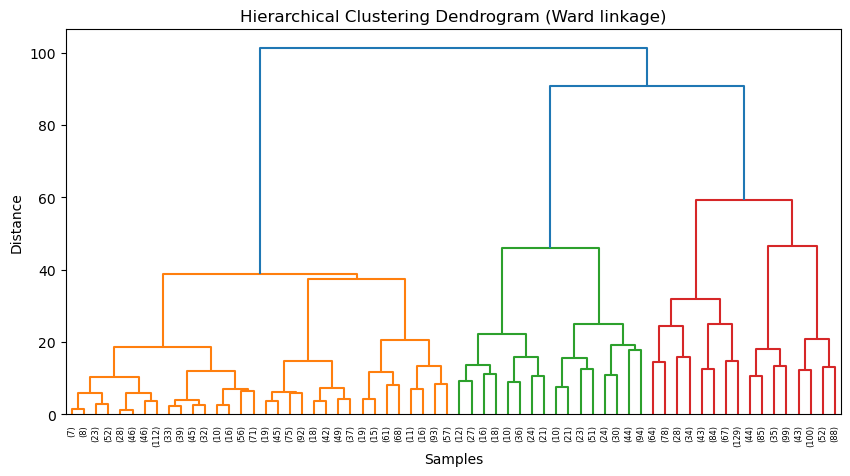

In [21]:
# =========================================================
# 2. HIERARCHICAL CLUSTERING
# =========================================================
# Dendrogram (Ward linkage as example)
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X, method="ward")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

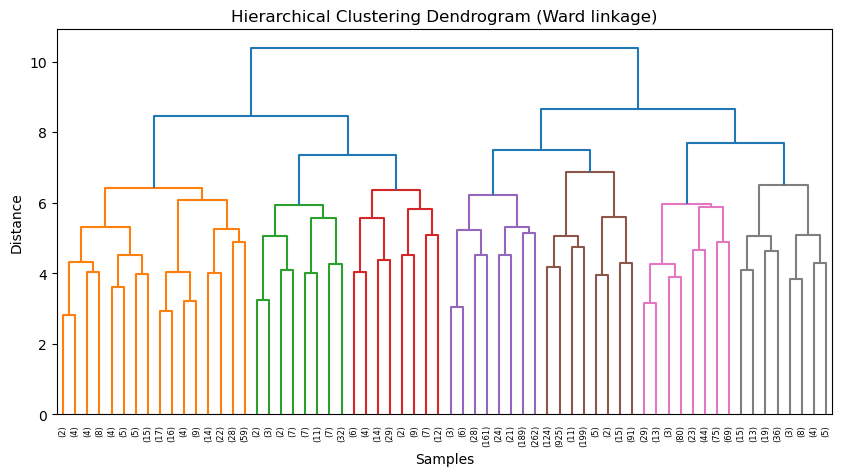

In [22]:
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X, method="complete")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

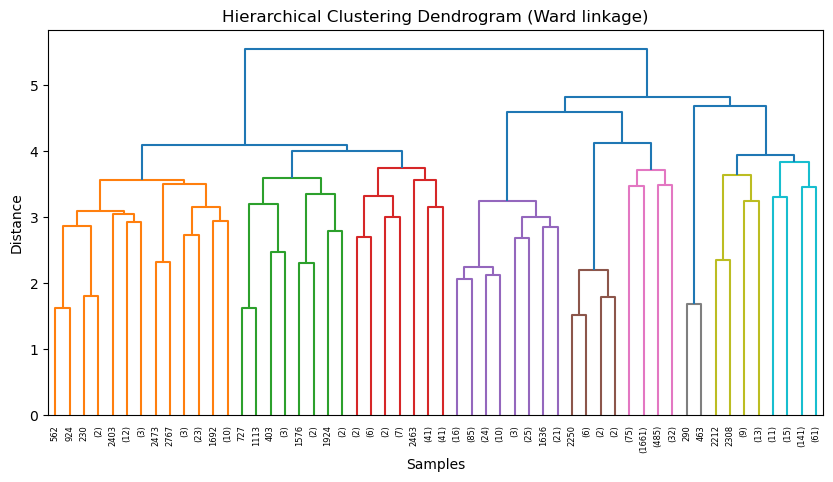

In [23]:
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X, method="average")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

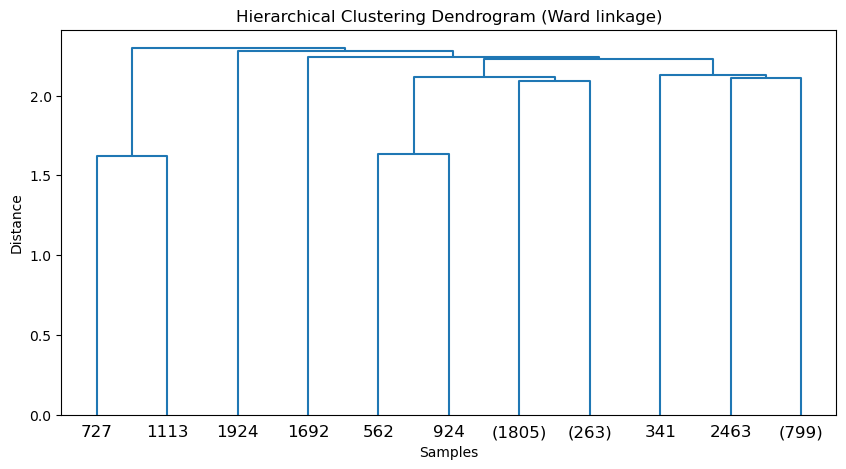

In [24]:
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X, method="single")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [26]:
# 3. DBSCAN CLUSTERING
# =========================================================
# Try different eps values
for eps in [1.5, 2, 3]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_db = dbscan.fit_predict(X)
    # Silhouette only valid if more than 1 cluster found
    if len(set(labels_db)) > 1 and -1 not in set(labels_db):
        sil = silhouette_score(X, labels_db)
        print(f"DBSCAN (eps={eps}) silhouette: {sil:.3f}, clusters={len(set(labels_db))}")
    else:
        print(f"DBSCAN (eps={eps}) formed {len(set(labels_db))} clusters (includes noise).")



DBSCAN (eps=1.5) formed 8 clusters (includes noise).
DBSCAN (eps=2) formed 8 clusters (includes noise).
DBSCAN (eps=3) formed 1 clusters (includes noise).


In [27]:
'''K-Means:
Separated customers into groups such as low-activity flyers, moderate flyers, high-value frequent flyers, and long-term but inactive members.
Hierarchical:
Showed clearer separation of frequent vs occasional flyers and highlighted tenure differences (new vs old customers).
DBSCAN:
Detected main dense clusters and flagged outliers (very high-balance VIPs or unusual flyers).'''

'K-Means:\nSeparated customers into groups such as low-activity flyers, moderate flyers, high-value frequent flyers, and long-term but inactive members.\nHierarchical:\nShowed clearer separation of frequent vs occasional flyers and highlighted tenure differences (new vs old customers).\nDBSCAN:\nDetected main dense clusters and flagged outliers (very high-balance VIPs or unusual flyers).'

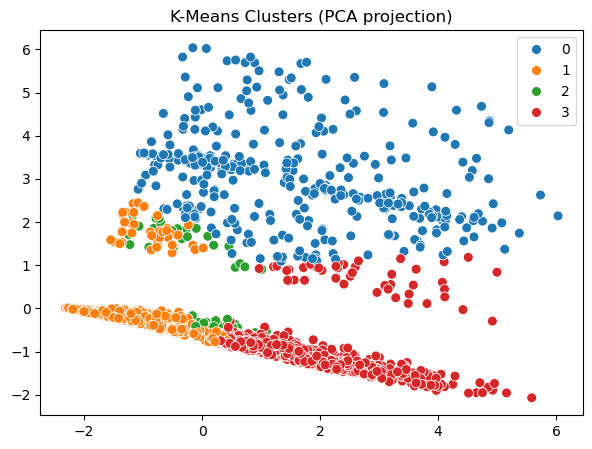

In [28]:
from sklearn.decomposition import PCA
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# --- K-Means visualization ---
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette="tab10", s=50)
plt.title("K-Means Clusters (PCA projection)")
plt.show()



In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Test different linkage methods
linkage_methods = ["ward", "complete", "average", "single"]

for method in linkage_methods:
    try:
        hc = AgglomerativeClustering(n_clusters=4, linkage=method)
        labels_hc = hc.fit_predict(df_scaled)
        sil = silhouette_score(df_scaled, labels_hc)
        print(f"Hierarchical (linkage={method}): silhouette = {sil:.3f}")
    except Exception as e:
        print(f"Method {method} not applicable: {e}")


Hierarchical (linkage=ward): silhouette = 0.302
Hierarchical (linkage=complete): silhouette = 0.296
Hierarchical (linkage=average): silhouette = 0.301
Hierarchical (linkage=single): silhouette = 0.347


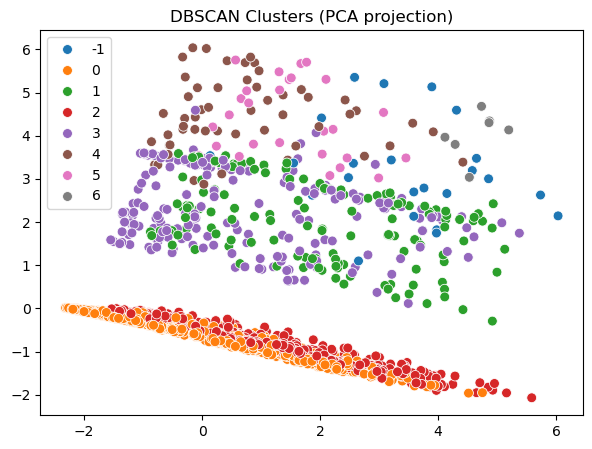

In [31]:
# --- Step 4: DBSCAN Clustering ---
dbscan = DBSCAN(eps=2, min_samples=5)
labels_db_final = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_db_final, palette="tab10", s=50)
plt.title("DBSCAN Clusters (PCA projection)")
plt.show()

In [32]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# --- K-Means ---
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    print(f"K-Means k={k}, Silhouette={silhouette_score(df_scaled, labels):.3f}")

# --- DBSCAN ---
for eps in [1.5, 2, 2.5]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(df_scaled)
    if len(set(labels)) > 1 and -1 not in labels:
        print(f"DBSCAN eps={eps}, Silhouette={silhouette_score(df_scaled, labels):.3f}")
    else:
        print(f"DBSCAN eps={eps} → not valid (clusters={set(labels)})")


K-Means k=2, Silhouette=0.322
K-Means k=3, Silhouette=0.342
K-Means k=4, Silhouette=0.230
K-Means k=5, Silhouette=0.242
DBSCAN eps=1.5 → not valid (clusters={np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)})
DBSCAN eps=2 → not valid (clusters={np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)})
DBSCAN eps=2.5 → not valid (clusters={np.int64(0), np.int64(-1)})
